# Task1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib inline

In [16]:
def generate1(weights, size):
    weights = weights / weights.sum()
    
    uniform = np.random.uniform(size=size)
    res = np.zeros(size)
    for i in range(uniform.size):
        current_sum = 0
        for j in range(len(weights)):
            if weights[j] + current_sum >= uniform.flat[i]:
                res.flat[i] = j
                break
            current_sum += weights[j]
    return res


def generate2(weights, size):
    weights = weights / weights.sum()
    weights = list(enumerate(weights))
    weights.sort(key=itemgetter(1), reverse=True)
    
    uniform = np.random.uniform(size=size)
    res = np.zeros(size)
    for i in range(uniform.size):
        current_sum = 0
        for number, weight in weights:
            if weight + current_sum >= uniform.flat[i]:
                res.flat[i] = number
                break
            current_sum += weight
    
    return res

(array([ 27.,  94.,  49.,  60.,  65., 127.,  18.,   7.,   0.,  53.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

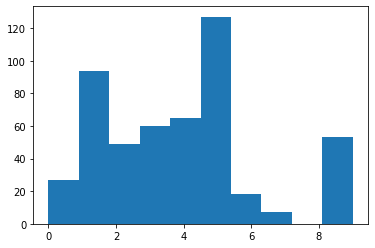

In [17]:
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
data = generate1(weights, 500)
plt.hist(data, bins=10)

(array([ 26.,  77.,  44.,  63.,  77., 134.,  19.,   6.,   1.,  53.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

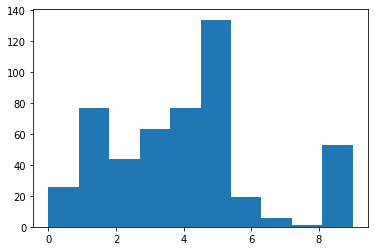

In [18]:
data = generate2(weights, 500)
plt.hist(data, bins=10)

In [19]:
%time data = generate1(weights, 10000)

Wall time: 43.9 ms


In [20]:
%time data = generate2(weights, 10000)

Wall time: 23.8 ms


Видим, что алгоритм с упорядоченными весами работает почти в два раза быстрее

# Task2

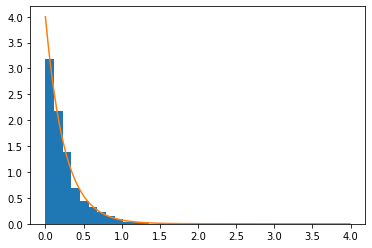

In [25]:
import scipy.stats
l = 4
uniform = np.random.uniform(size=1000)
exp = np.log(1 - uniform) / (-l)
plt.hist(exp, density=True, bins=20)

r = np.arange(0, 4, .01)
plt.plot(r, scipy.stats.expon.pdf(r, scale=1 / l))

# Task3

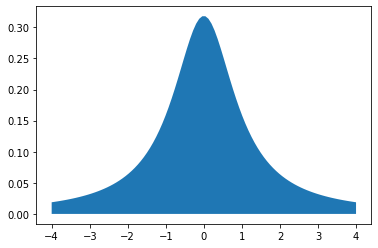

In [26]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

In [27]:
def special_cauchy(x, low, high):
    density = scipy.stats.cauchy.pdf(x)
    density[(x < low) | (x > high)] = 0
    density /= scipy.stats.cauchy.cdf(high) - scipy.stats.cauchy.cdf(low)
    return density


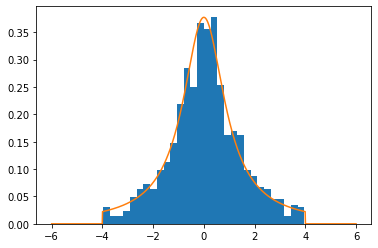

In [33]:
q = np.random.uniform(low=-4, high=4, size=5000)
p_density = truncated_cauchy(q, -4, 4)
q_density = scipy.stats.uniform.pdf(q, loc=-4, scale=8)
y = np.random.uniform(size=5000)
C = 4

p = q[y < p_density / (C * q_density)]
p = p[:1000]
plt.hist(p, density=True, bins=30)

r = np.linspace(-6, 6, 1000)
plt.plot(r, special_cauchy(r, -4, 4))

# Task4

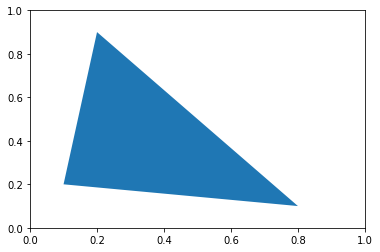

In [34]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

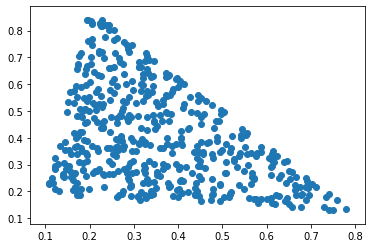

In [42]:
x = np.random.uniform(size=500)
y = np.random.uniform(size=500)

mask = (x + y) > 1
x[mask] = 1 - x[mask]
y[mask] = 1 - y[mask]

x =  .7 * x + .1 * y + .1
y = -.1 * x + .7 * y + .2

plt.scatter(x, y)

# Task5

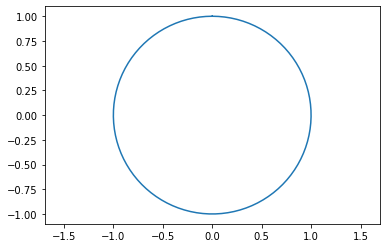

In [43]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

(-1.0711548281406806,
 1.0950983602551576,
 -1.0805198815468446,
 1.1059953582276023)

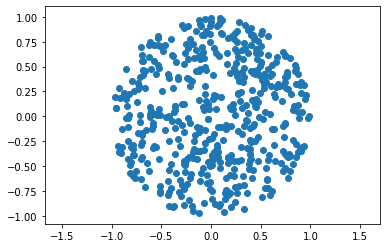

In [44]:
phi = np.random.uniform(low=0, high=2 * np.pi, size=500)
r = np.random.uniform(size=500)
r = np.sqrt(r)

plt.scatter(r * np.cos(phi), r * np.sin(phi))
plt.axis('equal')

# Task 6

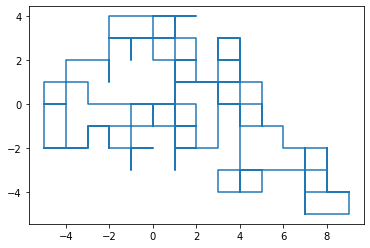

In [51]:
n = 200

a_minus = np.random.choice(np.arange(n), n // 2, replace=False)
b_minus = np.random.choice(np.arange(n), n // 2, replace=False)

a_st = np.ones(n)
a_st[a_minus] = -1

b_st = np.ones(n)
b_st[b_minus] = -1

a = np.cumsum(a_st)
b = np.cumsum(b_st)

x = (a + b) / 2
y = (b - a) / 2

plt.plot(x, y)

# Task7

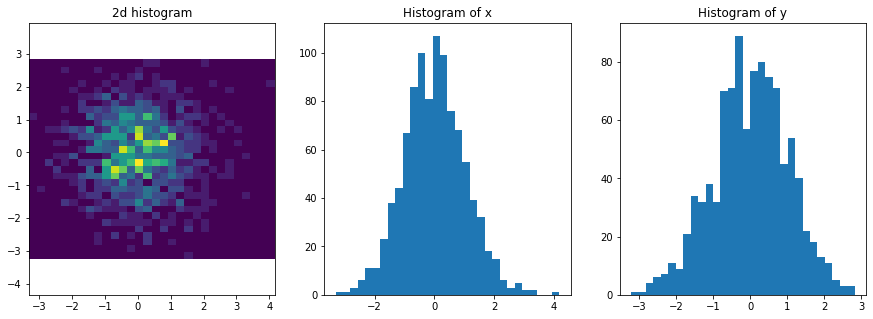

In [52]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

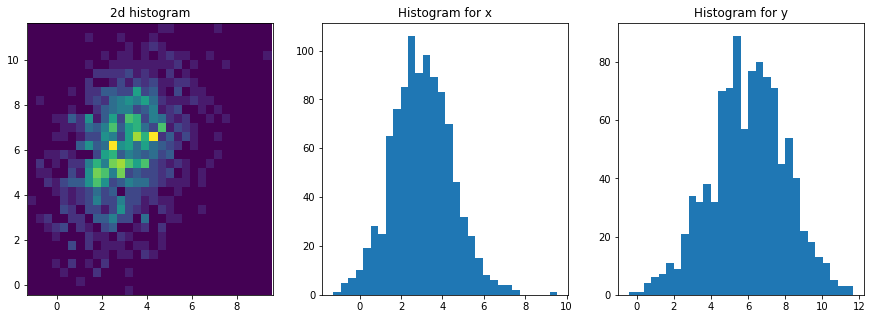

In [63]:
x_nov = np.sqrt(7) / 2 * x + 1 / 2 * y + 3
y_nov = 2 * y + 6

fig, axer = plt.subplots(1, 3, figsize=(15, 5))
axer[0].hist2d(x_nov, y_nov, bins=30)
axer[0].axis('Equal')
axer[1].hist(x_nov, bins=30)
axer[2].hist(y_nov, bins=30)
axer[0].set_title("2d histogram")
axer[1].set_title("Histogram for x")
axer[2].set_title("Histogram for y")
plt.show()

In [64]:
np.mean(x_nov), np.mean(y_nov)

(3.017918005223745, 6.025121638892208)

In [65]:
np.cov([x_nov, y_nov])

array([[2.06813353, 0.99365019],
       [0.99365019, 4.13817206]])

# Task 8

In [72]:
def partition(n, size):
    prob = np.zeros(n)
    
    factorial = 1
    for i in range(n):
        factorial *= (i + 1)
        prob[i] = (i + 1)**n / factorial
    prob /= prob.sum()
    
    groups = np.random.choice(np.arange(1, n + 1), p=prob, size=size)
    answer = np.zeros((size, n))
    for i in range(size):
        answer[i, :] = np.random.choice(np.arange(1, groups[i] + 1), size=n)
    return answer

Математическое ожидание для числа подмножеств случайного разбиения множества из 100 элементов

In [73]:
partition(100, 10000).max(axis=1).mean()

29.5964